In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#file input

x1,y1,x2,y2 = [],[],[],[]

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\linearly_seperable_data\Class1.txt") as df :
    for line in df:
        val = line.split()
        x1.append(float(val[0]))
        y1.append(float(val[1]))
print(len(x1),len(y1))

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\linearly_seperable_data\Class2.txt") as df :
    for line in df:
        val2 = line.split()
        x2.append(float(val2[0]))
        y2.append(float(val2[1]))
print(len(x2),len(y2))

#dataframe construction

Actual_classes =  [1]*len(x1) + [2]*len(x2)
X = x1 + x2
Y = y1 + y2
df = pd.DataFrame()
df['X'] = X
df['Y'] = Y
plt.scatter(df['X'], df['Y'], c = Actual_classes)
plt.show()


#List of lists of classes 1 and 2 with x and y as inputs
def matrix_construct(X,Y):
    d1 = [[],[]]
    d2 = [[],[]]
    for i in range(len(Y)):
        Xrow = list(X.iloc[i])
        if Y[i] == 1:
            d1[0].append(Xrow[0])
            d1[1].append(Xrow[1])
        elif Y[i] == 2:
            Xrow =list(X.iloc[i]) 
            d2[0].append(Xrow[0])
            d2[1].append(Xrow[1])
    return d1,d2
    
#returns mean,covariance and priors

def Gaussian_Model(X,Y):
    prior_class1 =  Y.count(1)
    prior_class2 = Y.count(2)
    prior = [prior_class1,prior_class2]
    Parameters = {}
    
    d1,d2 = matrix_construct(X,Y) 
    data1 = np.array(d1).astype(np.float)
    Mean = np.mean(data1, axis=1)
#     print(Mean.shape)
    Cov = np.cov(data1)
    print(Cov.shape)
    Parameters[1] = {}
    Parameters[1]['mean'] = Mean
    Parameters[1]['covariance'] = Cov

    data2 = np.array(d2).astype(np.float)
#     print(data2.shape)
    Mean = np.mean(data2, axis=1)
    Cov = np.cov(data2)
    print(Cov)
    Parameters[2] = {}
    Parameters[2]['mean'] = Mean
    Parameters[2]['covariance'] = Cov
    
    return Parameters,prior

#returns the classes predicted

def predict(X,Parameters,prior):
    ans = []
    for values in X.values:
#         print("Y")
        prob1 = prior[0]*posterior(values,Parameters,1)
        prob2 = prior[1]*posterior(values,Parameters,2)
#         print(prob1,prob2)
        assumed = 1
        if prob2 > prob1:
            assumed = 2
        ans.append(assumed)
    return ans

#returns the posterior probablities found

def posterior(vector, Parameters, Class):
    Mean = Parameters[Class]["mean"]  # 2*1 matrix
    Cov = Parameters[Class]["covariance"] # 2*2 matrix
    vector = np.array(vector)
    Num = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(vector - Mean), np.linalg.inv(Cov)), (vector - Mean)))
    Den = (2*3.14) * ((np.linalg.det(Cov)) ** 0.5)      
    Ans = Num/Den
    return Ans

def accuracy(val1,val2):
    ans = len(val1)
    for i in range(len(val)):
        if val1[i] != val2:
            ans -= 1
    return (ans/len(val2))*100
    
        
    
X_train, X_test, Y_train, Y_test = train_test_split(df, Actual_classes, test_size=0.3, random_state=42)
Parameters_obtained,prior = Gaussian_Model(X_train, Y_train)
print(Parameters_obtained)
Y_pred = predict(X_test,Parameters_obtained,prior)
print(accuracy(Y_test,Y_pred))
plt.scatter(X_test['X'], X_test['Y'], c = Y_pred)
plt.show()


 


1000 1000
1000 1000


<Figure size 640x480 with 1 Axes>

(2, 2)
[[ 1.01013793  3.59357734]
 [ 3.59357734 15.41264888]]
{1: {'mean': array([1.93233671, 0.97785088]), 'covariance': array([[2.90990964, 1.4360657 ],
       [1.4360657 , 0.95647647]])}, 2: {'mean': array([-5.07040127,  7.80148692]), 'covariance': array([[ 1.01013793,  3.59357734],
       [ 3.59357734, 15.41264888]])}}
99.66666666666667


<Figure size 640x480 with 1 Axes>

1000 1000
1000 1000


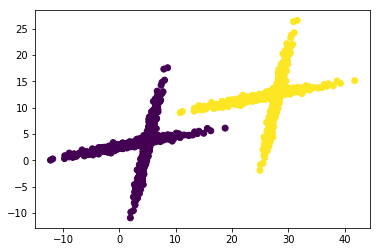

(2, 2)
99.66666666666667


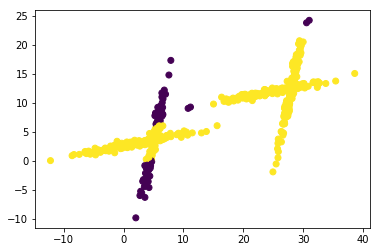

600 600


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#file input

x1,y1,x2,y2 = [],[],[],[]

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\non_linearly_seperable data\Class1.txt") as df :
    for line in df:
        val = line.split()
        x1.append(float(val[0]))
        y1.append(float(val[1]))
print(len(x1),len(y1))

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\non_linearly_seperable data\Class2.txt") as df :
    for line in df:
        val2 = line.split()
        x2.append(float(val2[0]))
        y2.append(float(val2[1]))
print(len(x2),len(y2))

#dataframe construction

Actual_classes =  [1]*len(x1) + [2]*len(x2)
X = x1 + x2
Y = y1 + y2
df = pd.DataFrame()
df['X'] = X
df['Y'] = Y
plt.scatter(df['X'],df['Y'],c = Actual_classes)
plt.show()


#List of lists of classes 1 and 2 with x and y as inputs
def matrix_construct(X,Y):
    d1 = [[],[]]
    d2 = [[],[]]
    for i in range(len(Y)):
        Xrow = list(X.iloc[i])
        if Y[i] == 1:
            d1[0].append(Xrow[0])
            d1[1].append(Xrow[1])
        elif Y[i] == 2:
            Xrow =list(X.iloc[i]) 
            d2[0].append(Xrow[0])
            d2[1].append(Xrow[1])
    return d1,d2
    
#returns mean,covariance and priors

def Gaussian_Model(X,Y):
    prior_class1 =  Y.count(1)
    prior_class2 = Y.count(2)
    prior = [prior_class1,prior_class2]
    Parameters = {}
    
    d1,d2 = matrix_construct(X,Y) 
    data1 = np.array(d1).astype(np.float)
    Mean = np.mean(data1, axis=1)
#     print(Mean.shape)
    Cov = np.cov(data1)
    print(Cov.shape)
    Parameters[1] = {}
    Parameters[1]['mean'] = Mean
    Parameters[1]['covariance'] = Cov

    data2 = np.array(d2).astype(np.float)
#     print(data2.shape)
    Mean = np.mean(data2, axis=1)
    Cov = np.cov(data2)
#     print(Cov)
    Parameters[2] = {}
    Parameters[2]['mean'] = Mean
    Parameters[2]['covariance'] = Cov
    
    return Parameters,prior

#returns the classes predicted

def predict(X,Parameters,prior):
    ans = []
    for values in X.values:
#         print("Y")
        prob1 = prior[0]*posterior(values,Parameters,1)
        prob2 = prior[1]*posterior(values,Parameters,2)
#         print(prob1,prob2)
        assumed = 1
        if prob2 > prob1:
            assumed = 2
        ans.append(assumed)
    return ans

#returns the posterior probablities found

def posterior(vector, Parameters, Class):
    Mean = Parameters[Class]["mean"]  # 2*1 matrix
    Cov = Parameters[Class]["covariance"] # 2*2 matrix
    vector = np.array(vector)
    Num = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(vector - Mean), np.linalg.inv(Cov)), (vector - Mean)))
    Den = (2*3.14) * ((np.linalg.det(Cov)) ** 0.5)      
    Ans = Num/Den
    return Ans

def accuracy(val1,val2):
    ans = len(val1)
    for i in range(len(val)):
        if val1[i] != val2:
            ans -= 1
    return (ans/len(val2))*100
    
        
       
#main function
    
X_train, X_test, Y_train, Y_test = train_test_split(df, Actual_classes, test_size=0.3, random_state=42)
Parameters_obtained,prior = Gaussian_Model(X_train, Y_train)
Y_pred = predict(X_test,Parameters_obtained,prior)
print(accuracy(Y_test,Y_pred))
plt.scatter(X_test['X'], X_test['Y'], c = Y_pred)
plt.show()

 


2388 2388
2164 2164
2291 2291


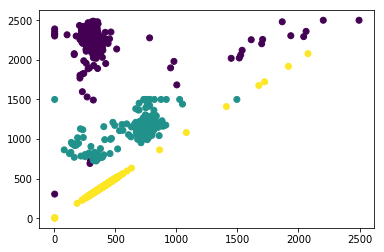

(2, 2)
[[7108.67288239 3874.7953389 ]
 [3874.7953389  6005.26313721]]
[[7108.67288239 3874.7953389 ]
 [3874.7953389  6005.26313721]]
99.90258158792011


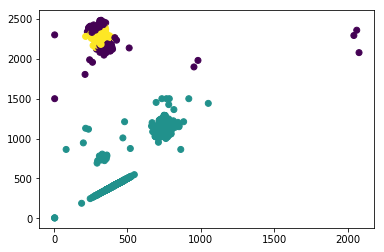

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#file input

x1,y1,x2,y2,x3,y3 = [],[],[],[],[],[]

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\real_world_data\Class1.txt") as df :
    for line in df:
        val = line.split()
        x1.append(float(val[0]))
        y1.append(float(val[1]))
print(len(x1),len(y1))

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\real_world_data\Class2.txt") as df :
    for line in df:
        val2 = line.split()
        x2.append(float(val2[0]))
        y2.append(float(val2[1]))
print(len(x2),len(y2))

with open(r"C:\Users\DELL\Documents\PatternRecognition\assignment_01\real_world_data\Class3.txt") as df :
    for line in df:
        val3 = line.split()
        x3.append(float(val3[0]))
        y3.append(float(val3[1]))
print(len(x3),len(y3))

#dataframe construction

Actual_classes =  [1]*len(x1) + [2]*len(x2) + [3]*len(x3)
X = x1 + x2 + x3
Y = y1 + y2 + x3
df = pd.DataFrame()
df['X'] = X
df['Y'] = Y
plt.scatter(df['X'],df['Y'],c = Actual_classes)
plt.show()


#List of lists of classes 1 and 2 with x and y as inputs
def matrix_construct(X,Y):
    d1 = [[],[]]
    d2 = [[],[]]
    d3 = [[],[]]
    for i in range(len(Y)):
        Xrow = list(X.iloc[i])
        if Y[i] == 1:
            d1[0].append(Xrow[0])
            d1[1].append(Xrow[1])
        elif Y[i] == 2:
            Xrow =list(X.iloc[i]) 
            d2[0].append(Xrow[0])
            d2[1].append(Xrow[1])
        elif Y[i] == 3:
            Xrow =list(X.iloc[i]) 
            d3[0].append(Xrow[0])
            d3[1].append(Xrow[1])
    return d1,d2,d3
    
#returns mean,covariance and priors

def Gaussian_Model(X,Y):
    prior_class1 =  Y.count(1)
    prior_class2 = Y.count(2)
    prior_class3 = Y.count(3)
    
    prior = [prior_class1,prior_class2,prior_class3]
    Parameters = {}
    
    d1,d2,d3 = matrix_construct(X,Y) 
    data1 = np.array(d1).astype(np.float)
    Mean = np.mean(data1, axis=1)
#     print(Mean.shape)
    Cov = np.cov(data1)
    print(Cov.shape)
    Parameters[1] = {}
    Parameters[1]['mean'] = Mean
    Parameters[1]['covariance'] = Cov

    data2 = np.array(d2).astype(np.float)
#     print(data2.shape)
    Mean = np.mean(data2, axis=1)
    Cov = np.cov(data2)
    print(Cov)
    Parameters[2] = {}
    Parameters[2]['mean'] = Mean
    Parameters[2]['covariance'] = Cov
    
    data3 = np.array(d3).astype(np.float)
#     print(data2.shape)
    Mean = np.mean(data1, axis=1)
    Cov = np.cov(data2)
    print(Cov)
    Parameters[3] = {}
    Parameters[3]['mean'] = Mean
    Parameters[3]['covariance'] = Cov
    
    return Parameters,prior

#returns the classes predicted

def predict(X,Parameters,prior):
    ans = []
    for values in X.values:
#         print("Y")
        prob1 = prior[0]*posterior(values,Parameters,1)
        prob2 = prior[1]*posterior(values,Parameters,2)
        prob3 = prior[2]*posterior(values,Parameters,3)
#         print(prob1,prob2)
        assumed = 1
        if prob2 < prob3 and prob1 < prob3:
            assumed = 3
        elif prob1 < prob2 and prob3 < prob2:
            assumed = 2
        ans.append(assumed)
    return ans

#returns the posterior probablities found

def posterior(vector, Parameters, Class):
    Mean = Parameters[Class]["mean"]  # 3*1 matrix
    Cov = Parameters[Class]["covariance"] # 3*3 matrix
    vector = np.array(vector)
    Num = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(vector - Mean), np.linalg.inv(Cov)), (vector - Mean)))
    Den = (2*3.14) * ((np.linalg.det(Cov)) ** 0.5)      
    Ans = Num/Den
    return Ans

    
        
       
#main function
    
X_train, X_test, Y_train, Y_test = train_test_split(df, Actual_classes, test_size=0.3, random_state=42)
Parameters_obtained,prior = Gaussian_Model(X_train, Y_train)
Y_pred = predict(X_test,Parameters_obtained,prior)
print(accuracy(Y_test,Y_pred))
plt.scatter(X_test['X'], X_test['Y'], c = Y_pred)
plt.show()


 


['sdfs', 'fgs']
